# Support Vector Machine

## 5.1 Linear SVM Classification

In [1]:
# iris dataset
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()
print("Iris Data Keys : ", list(iris.keys()))

Iris Data Keys :  ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [23]:
iris_data = iris['data']
iris_target = iris['target']
iris_target_names = iris['target_names']
iris_features = iris['feature_names']

print('target : ', iris_features) # we will use length and width here (petal)
print('target_names : ', iris_target_names)

target :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names :  ['setosa' 'versicolor' 'virginica']


In [54]:
X = iris_data[:, 2:]
y = iris_target

# we will classify verginica or not
t_idx = (y == 2)
f_idx = (y != 2)

X_t = X[t_idx]
y_t = y[t_idx]

X_f = X[f_idx]
y_f = y[f_idx]

[]

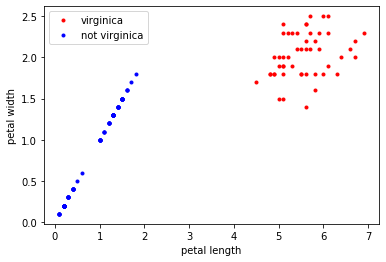

In [55]:
# plot data
import matplotlib.pyplot as plt
%matplotlib inline

X_t_length = X_t[:, 0:1]
X_t_width = X_t[:, 1:2]
X_f_length = X_f[:, 0:1]
X_f_width = X_f[:, 1:2]

plt.plot(X_t_length, X_t_width, 'r.')
plt.plot(X_f_width, X_f_width, 'b.')
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(["virginica", "not virginica"])
plt.plot()

In [64]:
# svm classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X_train = iris["data"][:, (2, 3)]
y_train = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X_train, y_train)
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [66]:
# plot decision boundary
def plot_decision_boundaries(X, y, model_class, **model_params):
    """Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    
    One possible improvement could be to use all columns fot fitting
    and using the first 2 columns and median of all other columns
    for predicting.
    
    Adopted from:
    http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    reduced_data = X[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    return plt

<module 'matplotlib.pyplot' from '/usr/local/anaconda3/envs/cs231n-2/lib/python3.7/site-packages/matplotlib/pyplot.py'>

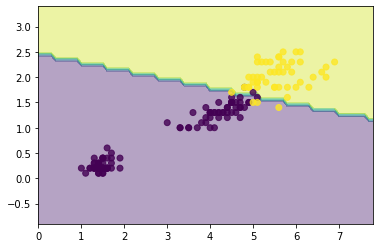

In [71]:
plot_decision_boundaries(X_train, y_train, LinearSVC)